<a href="https://colab.research.google.com/github/Nani9966/ANN/blob/main/20230122_ANN_CLASS_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns


In [2]:
mnist=tf.keras.datasets.mnist


In [3]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.8/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [5]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

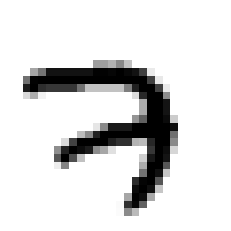

In [10]:
plt.imshow(X_train_full[5000],cmap='binary')
plt.axis('off')
plt.show()

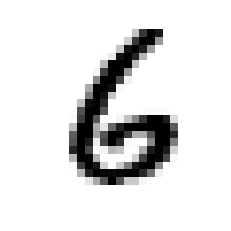

In [12]:
plt.imshow(X_train_full[6000],cmap='binary')
plt.axis('off')
plt.show()

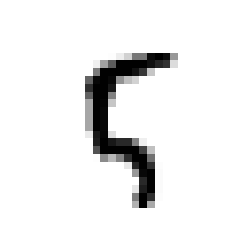

In [13]:
plt.imshow(X_train_full[100],cmap='binary')
plt.axis('off')
plt.show()

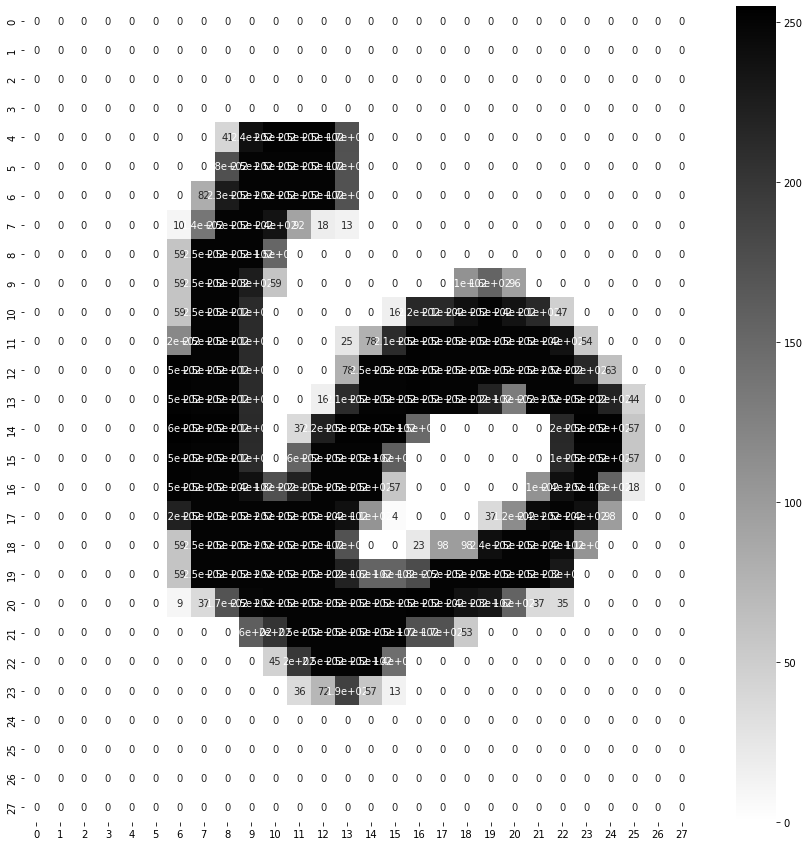

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train_full[9000],annot=True,cmap='binary')

In [22]:
X_valid ,X_train=X_train_full[:5000]/255., X_train_full[5000:]/255.                             ########dividing with 255 pixal value to normilizing to sclae 
y_valid ,y_train=y_train_full[:5000],y_train_full[5000:]

In [23]:
X_test=X_test/255.

In [24]:
print(X_valid.shape)
print(X_train.shape)
print(y_valid.shape)
print(y_train.shape)

(5000, 28, 28)
(55000, 28, 28)
(5000,)
(55000,)


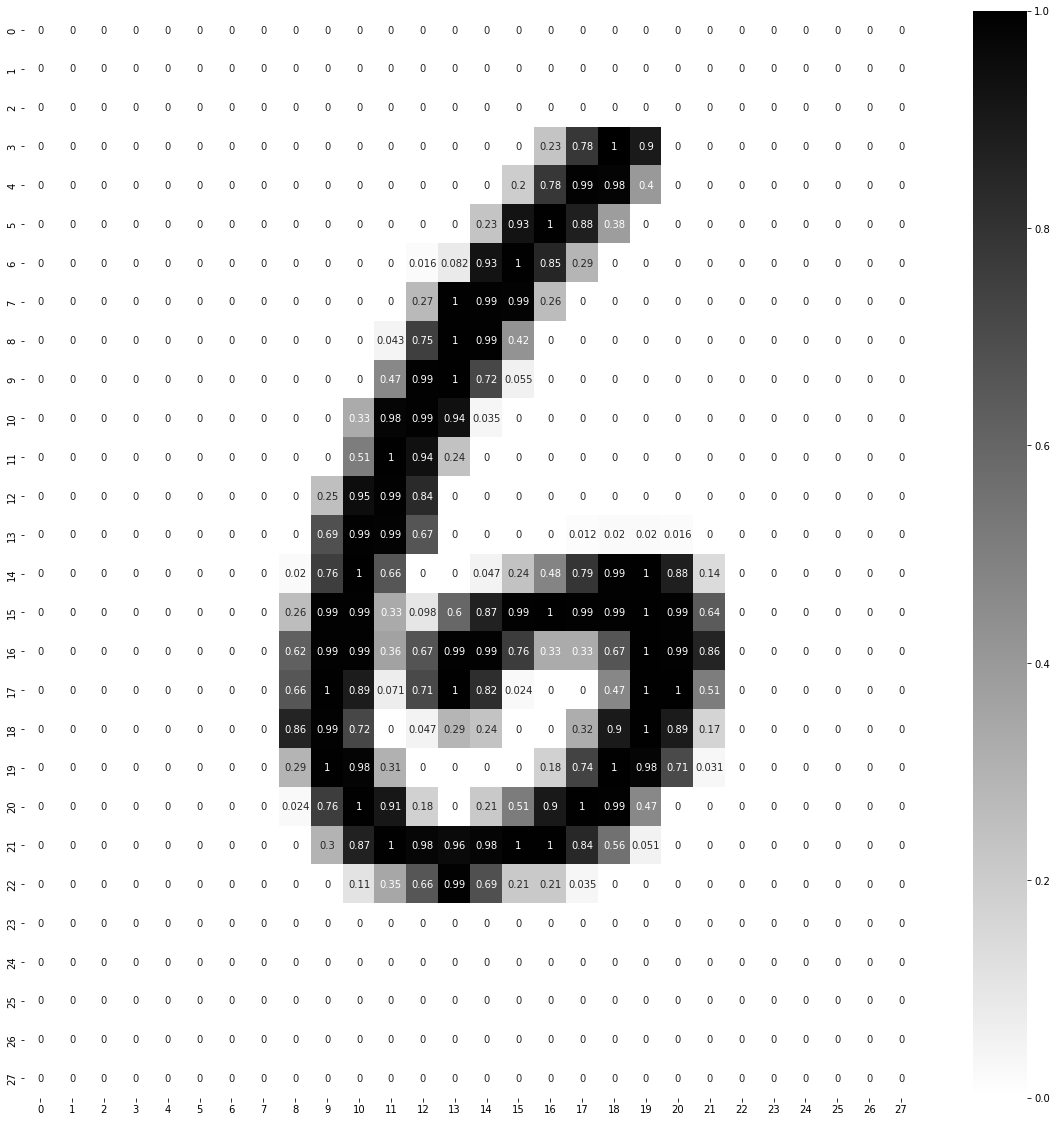

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train[1000],annot=True,cmap="binary")

In [27]:
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"),
        tf.keras.layers.Dense(300,activation="relu",name="hiddenlayer1"),
        tf.keras.layers.Dense(100,activation='relu',name="hiddenlayer2"),
        tf.keras.layers.Dense(10,activation='softmax',name="outputlayer")]

In [28]:
model_clf=  tf.keras.models.Sequential(LAYERS)

In [30]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [31]:
LOSS_FUNCTION="sparse_categorical_crossentropy"
OPTIMIZER="ADAM"
METRICS=["accuracy"]


In [33]:

model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

In [37]:
model_clf.layers[1].name

'hiddenlayer1'

In [38]:
hidden1=model_clf.layers[1]

In [39]:
weights=hidden1.get_weights()

[array([[-0.05196214,  0.03293746, -0.03148049, ..., -0.04502726,
         -0.02285673,  0.02080638],
        [-0.01028487,  0.00667181, -0.00523114, ..., -0.06187582,
          0.00224458, -0.03899587],
        [ 0.05868597, -0.04397281,  0.03888787, ...,  0.01956218,
          0.01974418,  0.07389024],
        ...,
        [ 0.05159482,  0.01797976, -0.05442703, ..., -0.07323951,
          0.05228664,  0.00194613],
        [ 0.05443394,  0.04649591, -0.06650811, ...,  0.01450788,
         -0.00621066, -0.04371066],
        [ 0.00698929,  0.02589769, -0.07323981, ..., -0.01295493,
          0.01205016, -0.01368305]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [40]:
EPOCHS=5
VALIDATION_SET=(X_valid,y_valid)
history=model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 8s 3ms/step - loss: 0.2134 - accuracy: 0.9360 - val_loss: 0.1052 - val_accuracy: 0.9670
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0886 - accuracy: 0.9717 - val_loss: 0.0894 - val_accuracy: 0.9718
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0602 - accuracy: 0.9802 - val_loss: 0.0804 - val_accuracy: 0.9770
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0443 - accuracy: 0.9856 - val_loss: 0.0735 - val_accuracy: 0.9806
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0337 - accuracy: 0.9889 - val_loss: 0.0744 - val_accuracy: 0.9800


In [44]:
import time
import os

def savemodel_path(model_dir="content/SAVED_MODELS"):
  os.makedirs(model_dir,exist_ok=True)
  fileName=time.strftime("Model_%Y_%m_%d_%H_%M_%S.h5")
  model_path=os.path.join(model_dir,fileName) 
  print(f"your model will be saved at the following loaction\n {model_path}")
  return model_path


In [45]:
model_clf.save(savemodel_path())

your model will be saved at the following loaction
 content/SAVED_MODELS/Model_2023_01_23_18_35_52.h5


In [46]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 1719}

In [47]:
history.history  #json formate

{'loss': [0.21343131363391876,
  0.08862323313951492,
  0.060221340507268906,
  0.044310010969638824,
  0.03371429443359375],
 'accuracy': [0.935981810092926,
  0.9717272520065308,
  0.9801636338233948,
  0.9855636358261108,
  0.9889090657234192],
 'val_loss': [0.10519766807556152,
  0.08943096548318863,
  0.080389603972435,
  0.07352995127439499,
  0.07438721507787704],
 'val_accuracy': [0.9670000076293945,
  0.9718000292778015,
  0.9769999980926514,
  0.9805999994277954,
  0.9800000190734863]}

In [48]:
pd.DataFrame(history.history)  #panda formate

,loss,accuracy,val_loss,val_accuracy
0,0.213431,0.935982,0.105198,0.9670
1,0.088623,0.971727,0.089431,0.9718
2,0.060221,0.980164,0.080390,0.9770
3,0.044310,0.985564,0.073530,0.9806
4,0.033714,0.988909,0.074387,0.9800


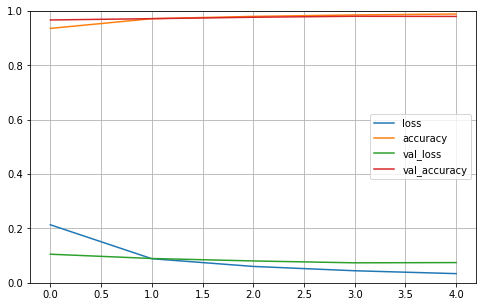

In [49]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [50]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.4890 - accuracy: 0.0892


[2.4889955520629883, 0.08919999748468399]

In [51]:
X_test[3]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [ ]:
model_clf.predict()

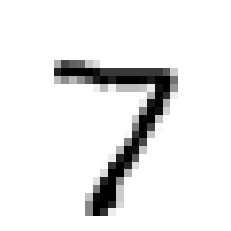

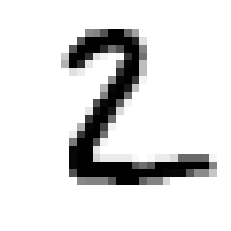

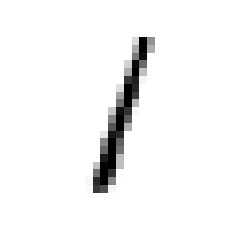

In [58]:
for i  in range(0,3):
  #print(i)
  plt.imshow(X_test[i],cmap="binary")
  plt.axis("off")
  plt.show()
  X_test[3]

In [61]:
prediction=model_clf.predict(X_test[:3])

1/1 [==============================] - 0s 16ms/step


In [62]:
prediction

array([[0.04244599, 0.0453776 , 0.05904952, 0.06890866, 0.07335558,
        0.35900775, 0.07117643, 0.06385727, 0.12077765, 0.09604359],
       [0.04523053, 0.04599912, 0.06300002, 0.06596869, 0.06367165,
        0.35605934, 0.09125668, 0.0505069 , 0.13402826, 0.08427879],
       [0.04030608, 0.04422045, 0.05498528, 0.06324814, 0.0640395 ,
        0.3932517 , 0.07760695, 0.05194907, 0.12027658, 0.0901163 ]],
      dtype=float32)

In [72]:
y_prob=prediction[1]

In [73]:
y_prob.round(6)

array([0.045231, 0.045999, 0.063   , 0.065969, 0.063672, 0.356059,
       0.091257, 0.050507, 0.134028, 0.084279], dtype=float32)

In [74]:
np.argmax(y_prob.round(5))

5

In [ ]:
model=